## Importanto bibliotecas e dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Informações estatísticas dos dados

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
quality = df.quality.unique()
quality

array([5, 6, 7, 4, 8, 3])

In [8]:
quantidade = df.quality.value_counts()
quantidade

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

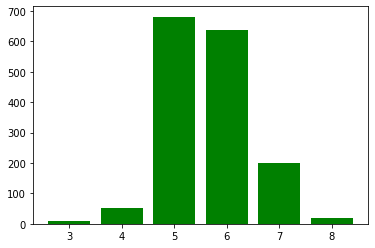

In [9]:
plt.bar(quality, quantidade, color='green', width=0.8)
plt.show()

Percebe-se que há muitos valores para a qualidade 5 e 6 do que valores mais altos ou mais baixos, talvez isso possa impactar no modelo de predição.

## Verificação da correlação entre as variáveis (target=quality)

In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
correlacao = df.corr()
correlacao.quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Os valores positivos são os que apresentam melhor correlação com o a qualidade do vinho, por isso serão as variáveis utilizadas para a predição.


*   Alcohol
*   Sulphates
*   Citric acid
*   Fixed acidicy
*   Residual sugar


# Verificar relação de Quality x correlações positivas

Text(0.5, 1.0, 'Quality x Alcohol')

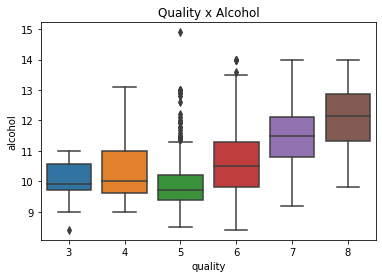

In [12]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Quality x Alcohol")

Text(0.5, 1.0, 'Quality x Sulphates')

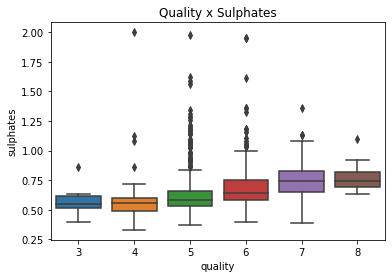

In [13]:
sns.boxplot(x='quality', y='sulphates', data=df)
plt.title("Quality x Sulphates")

Text(0.5, 1.0, 'Quality x Citric Acid')

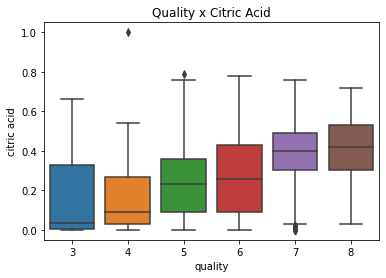

In [14]:
sns.boxplot(x='quality', y='citric acid', data=df)
plt.title("Quality x Citric Acid")

Text(0.5, 1.0, 'Quality x Fixed Acidity')

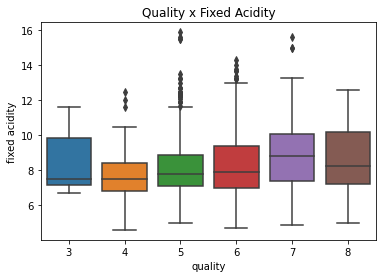

In [15]:
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.title("Quality x Fixed Acidity")

Text(0.5, 1.0, 'Quality x Residual Sugar')

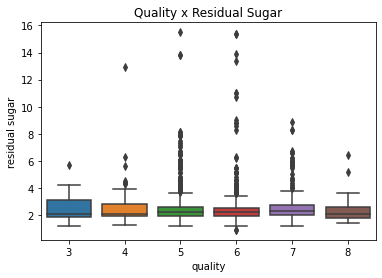

In [16]:
sns.boxplot(x='quality', y='residual sugar', data=df)
plt.title("Quality x Residual Sugar")

## Separação do dataset para testagem

In [17]:
y = df['quality']
y.sample(5)

525     5
1479    5
743     5
338     6
976     5
Name: quality, dtype: int64

In [18]:
#features = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
features = ['fixed acidity',	'citric acid',	'residual sugar',	'sulphates',	'alcohol']
X = df[features]
X.sample(5)

,fixed acidity,citric acid,residual sugar,sulphates,alcohol
1095,9.4,0.47,2.5,0.50,10.5
935,8.8,0.38,2.3,0.72,11.8
1050,7.1,0.17,1.8,0.64,10.4
757,8.1,0.00,2.2,0.50,9.8
520,9.8,0.49,2.7,0.90,10.0


Separação do valor alvo (y) e do dataframe com os valores escolhidos para treino (X)

## Importação da KneighborsRegressor

O KNN é um dos algoritmos de machine learning mais simples. Basicamente seu funcionamento é realizado por do calculo da distância de um valor alvo com os seus vizinhos mais próximos, a partir disso o algoritmo tenta classificar o valor alvo.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
modelo = KNeighborsRegressor(5)

In [21]:
modelo.fit(X,y)

KNeighborsRegressor()

In [22]:
modelo.predict(X.tail(5))

array([5.8, 5.6, 6.2, 5.8, 5.2])

In [23]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [24]:
modelo.score(X, y)

0.50303459747891

O modelo apresentou 50% de acurácia, um possível motivo é do KNeighborsRegressor retornar um valor float.

Abaixo farei a demonstração do mesmo modelo, mas separando o valor alvo em categorias (ruim, normal, bom) de acordo com seu valor.


*   0 a 4 -> Ruim
*   5 e 6 -> Normal
*   7 a 10 -> Bom



# Análise separando o Target em categorias

In [25]:
condition = [
             df.quality < 5,
             df.quality >= 7
]
rating = ['bad', 'good']
df['category'] = np.select(condition, rating, default='Normal') #https://numpy.org/doc/stable/reference/generated/numpy.select.html
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Normal


In [26]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
1188,6.7,0.640,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,Normal
789,8.6,0.630,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3,5,Normal
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5,Normal
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7,4,bad
351,9.1,0.795,0.00,2.6,0.096,11.0,26.0,0.99940,3.35,0.83,9.4,6,Normal
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5,Normal
957,9.5,0.370,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,6,Normal
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5,Normal
1315,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,Normal
177,7.5,0.520,0.42,2.3,0.087,8.0,38.0,0.99720,3.58,0.61,10.5,6,Normal


In [27]:
df.category.value_counts()

Normal    1319
good       217
bad         63
Name: category, dtype: int64

In [28]:
category = df.category

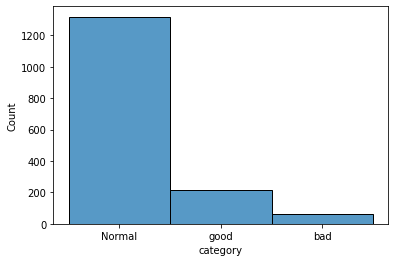

In [29]:
sns.histplot(data=df, x='category')

# Verificar por KNeighborsClassifier

Esse algoritmo ao invés de fazer uma regressão, faz uma classificação de qual categoria cada valor pertence.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
y2 = df['category']

In [32]:
modelo2 = KNeighborsClassifier(5)
modelo2.fit(X, y2)
modelo2.predict(X.sample(10))

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal'], dtype=object)

In [33]:
modelo2.score(X, y2)

0.8711694809255784

Acurácia de 87%, bem maior que a acurácia utilizando o KNeighborsRegressor

Porém foi utilizado todo o dataset para validação, o que não é o ideal pois isso pode causar um overfitting do nosso modelo.

## Validação Train Test Split

Separação de 80% dos dados para treinamento e 20% para teste

In [34]:
from sklearn.model_selection import train_test_split
treino_X, val_X, treino_y, val_y = train_test_split(X,y2,random_state=4,train_size=0.8)

In [35]:
print(treino_X.shape)
print(val_X.shape)

(1279, 5)
(320, 5)


In [36]:
modelo4 = KNeighborsClassifier(5)
modelo4.fit(treino_X, treino_y)

KNeighborsClassifier()

In [37]:
predicao = modelo4.predict(val_X)

### Validar a acurácia utilizando a biblioteca metrics

In [38]:
from sklearn import metrics

In [39]:
metrics.accuracy_score(val_y, predicao)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score

0.840625

Acurácia separando os dados em um conjunto de treino e teste trouxe um resultado satisfatório, mas será que da para melhorar?

### Encontrando o melhor valor de K

In [40]:
intervalos_k = range(1, 30, 2) #Range de valores ímpares para evitar empates

scores = []

for k in intervalos_k:
  modelo5 = KNeighborsClassifier(n_neighbors=k)
  modelo5.fit(treino_X, treino_y)
  predicao2 = modelo5.predict(val_X)
  acuracia = metrics.accuracy_score(val_y, predicao2)
  print("K = {}, acurácia de {}".format(k, acuracia))
  scores.append(acuracia)


K = 1, acurácia de 0.834375
K = 3, acurácia de 0.834375
K = 5, acurácia de 0.840625
K = 7, acurácia de 0.840625
K = 9, acurácia de 0.85
K = 11, acurácia de 0.84375
K = 13, acurácia de 0.8375
K = 15, acurácia de 0.846875
K = 17, acurácia de 0.85
K = 19, acurácia de 0.853125
K = 21, acurácia de 0.84375
K = 23, acurácia de 0.846875
K = 25, acurácia de 0.840625
K = 27, acurácia de 0.8375
K = 29, acurácia de 0.834375


Vamos plotar os pontos em um gráfico para melhorar a visualização

Text(0, 0.5, 'Acurácia')

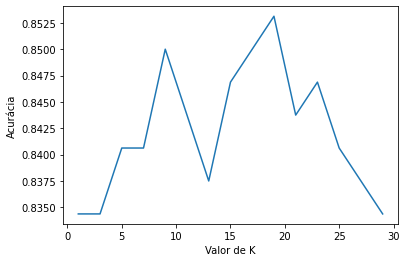

In [41]:
plt.plot(intervalos_k, scores)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

Constata-se que o valor de K = 19 foi o que trouxe a maior acurária (85,25%), um pouco acima da nossa primeira validação com K = 5.

Essa técnica de amostragem também é conhecida como Holdout, dependendo de como eu faça a separação dos dados, um resultado diferente para a acurácia pode ser obtido (tanto é que se alterarmos o parâmetro **random_state** obtemos diferêntes valores de acurácia para o modelo)

Abaixo farei a demonstração utilizando a técnica de K-fold Cross-validation, que faz o particionamento dos dados em um número K de subconjuntos, e a cada iteração de treino e teste um subconjunto de (K - 1) será utilizado para treinamento, e o subconjunto restante para teste, isso garante que todos os subconjuntos serão utilizados para testar o modelo

## Usando cross-validation

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
modelo3 = KNeighborsClassifier(19)

In [58]:
modelo3.fit(X, y2)


KNeighborsClassifier(n_neighbors=19)

In [59]:
cv_scores = cross_val_score(modelo3, X, y2, cv=10)

In [60]:
print(cv_scores)
print('cv_scores mean: {} (+/- {})'.format(np.mean(cv_scores).round(4), cv_scores.std().round(4)))

[0.825      0.84375    0.83125    0.81875    0.8375     0.83125
 0.8125     0.8125     0.84375    0.82389937]
cv_scores mean: 0.828 (+/- 0.011)


O resultado final da análise para esse método foi de uma acurácia de 82,80% +/- 1,10%

## Utilizando o algoritmo de Árvore de Decisão

Um outro algoritmo além do KNN é a árvore de Decisão. Esse algoritmo basicamente possui uma estrutura de árvore que em cada nó possui uma determinada pergunta (Ex: Residual Suga < 1.8?), e dependendo da resposta o algoritmo tenta fazer a predição, ou direciona a árvore para um ramo inferior com outra pergunta a ser respondida.

Abaixo farei a demonstração desse algoritmo em conjunto com a técnica de amostragem de validação cruzada, já utilizada anteriormente.


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(max_depth=10)

In [49]:
dt.fit(X, y2)

DecisionTreeClassifier(max_depth=10)

In [50]:
cv_scores2 = cross_val_score(dt, X, y2, cv=10)

In [51]:
print(cv_scores2)
print('cv_scores mean: {} (+/- {})'.format(np.mean(cv_scores2).round(4), cv_scores2.std().round(4)))

[0.83125    0.85625    0.81875    0.78125    0.85625    0.79375
 0.7375     0.725      0.81875    0.80503145]
cv_scores mean: 0.8024 (+/- 0.0423)


O resultado final foi uma acurácia de 80,24% +/- 4,23%

### Plotando uma Árvore de Decisão

In [52]:
#pip install graphviz

In [53]:
#pip install pydotplus

In [54]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [55]:
y2

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
1594    Normal
1595    Normal
1596    Normal
1597    Normal
1598    Normal
Name: category, Length: 1599, dtype: object

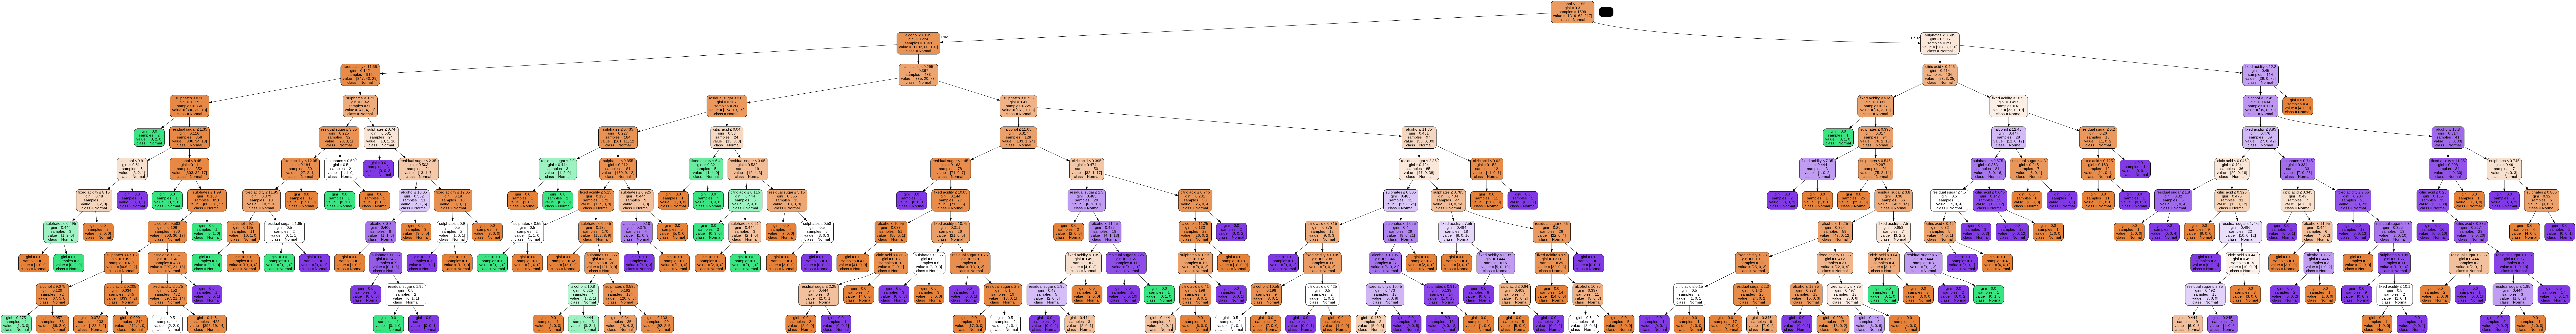

In [56]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=y2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree_winequality.png')
Image(graph.create_png())